### **UNGUIDED MODUL 3**

**Nama : Vania Noverina**

**NIM : 2311110031**

**Kelas : SD-04-B**

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE # oversampling
from wordcloud import WordCloud # visualisasi kata

# **Load Data**

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


## **1. Imputasi missing value dengan mean, median, dan modus**

**Imputasi** adalah proses mengisi nilai yang hilang (missing values) dalam dataset. Pada langkah ini, kita membuat tiga versi dataset di mana nilai yang hilang diisi menggunakan mean (rata-rata), median, dan mode (nilai paling sering muncul).


**Fungsi fillna()** digunakan untuk mengisi nilai yang hilang:

**mean()** : digunakan untuk menghitung rata-rata dari setiap kolom yang memiliki missing values.

**median()**: digunakan untuk menghitung nilai tengah dari setiap kolom.

**mode()** : digunakan untuk mengambil nilai yang paling sering muncul (hanya mengambil yang pertama jika ada lebih dari satu mode).

In [3]:
# Imputation: fill missing values with mean, median, and mode
mean_imputed = df.copy()
median_imputed = df.copy()
mode_imputed = df.copy()

# Impute with mean
mean_imputed.fillna(mean_imputed.mean(), inplace=True)

# Impute with median
median_imputed.fillna(median_imputed.median(), inplace=True)

# Impute with mode
for column in mode_imputed.columns:
    mode_imputed[column].fillna(mode_imputed[column].mode()[0], inplace=True)


<ipython-input-3-a2dd686522ab>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mode_imputed[column].fillna(mode_imputed[column].mode()[0], inplace=True)
<ipython-input-3-a2dd686522ab>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## **2. Cek korelasi antar variabel dengan heatmap**

**Korelasi** mengukur seberapa erat hubungan antar variabel. Korelasi berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna). Jika mendekati 0, maka tidak ada korelasi.

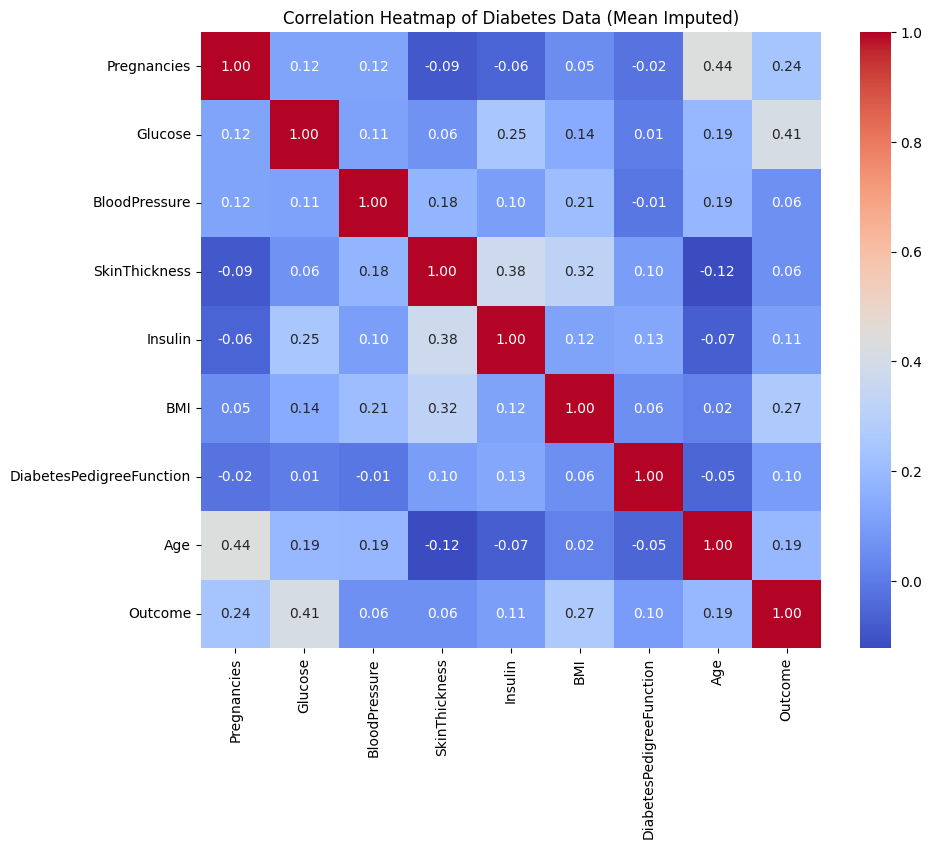

In [5]:
# Calculate the correlation matrix
correlation_matrix = mean_imputed.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Diabetes Data (Mean Imputed)")
plt.show()

## **3. Imbalance Handling dengan Undersampling**

**Imbalance handling** bertujuan untuk mengatasi masalah ketidakseimbangan kelas pada variabel target Outcome, pada dataset klasifikasi. Di sini, kelas 0 (sehat) jauh lebih banyak daripada kelas 1 (diabetes).

**Undersampling** adalah teknik untuk mengurangi ukuran kelas mayoritas sehingga seimbang dengan kelas minoritas.

**Fungsi resample()** digunakan untuk memilih subset dari kelas mayoritas yang sama banyaknya dengan kelas minoritas.

In [6]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = mean_imputed[mean_imputed['Outcome'] == 0]
minority_class = mean_imputed[mean_imputed['Outcome'] == 1]

# Undersample the majority class to match the minority class size
majority_class_downsampled = resample(majority_class,
                                      replace=False,  # sample without replacement
                                      n_samples=len(minority_class),  # match minority class size
                                      random_state=42)

# Combine minority class with downsampled majority class
diabetes_balanced = pd.concat([majority_class_downsampled, minority_class])

# Check the new class distribution
print(diabetes_balanced['Outcome'].value_counts())


Outcome
0    268
1    268
Name: count, dtype: int64


## **4. Scaling dengan Robust Scaler dan Min-Max Scaler**

**Scaling** digunakan untuk menormalkan data sehingga semua fitur berada pada skala yang sama, mengurangi pengaruh fitur dengan skala besar. Ini penting untuk algoritma machine learning yang sensitif terhadap skala data.

**Robust Scaler** mengurangi pengaruh outliers dengan menggunakan kuartil, sehingga lebih tahan terhadap nilai ekstrim.

**Min-Max Scaler** mengubah nilai data ke dalam rentang antara 0 dan 1, sering digunakan ketika nilai semua fitur perlu dibandingkan secara langsung.

In [11]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Features (excluding the target 'Outcome')
X = diabetes_balanced.drop('Outcome', axis=1)

# Apply Robust Scaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

# Apply Min-Max Scaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Convert scaled data back to DataFrame for easier handling
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Preview scaled data
print("Robust Scaler")
print(X_robust_scaled_df.head())
print("Min-Max Scaler")
print(X_minmax_scaled_df.head())

Robust Scaler
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
1     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
2    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   
3    -0.360637  0.258713       1.253393       -0.68750 -0.807123 -0.974068   
4     0.639363 -0.559469       0.420060        0.56250  0.000000  1.269834   

   DiabetesPedigreeFunction       Age  
0                 -0.378594 -0.263844  
1                  1.014377 -0.680510  
2                 -1.073706 -0.930510  
3                 -0.167732 -0.513844  
4                 -0.423323  0.000000  
Min-Max Scaler
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
1     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
2     0.176471  0.557789    